<a href="https://colab.research.google.com/github/EsserMishelle/DataScience/blob/main/Housing_Prices_King_County_MishelleEsser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Predicting Housing Prices in King County
# Due 12/14 EOD

## Dataset
We will use the **King County House Sales dataset**:  
[House Sales Prediction (Kaggle)](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

- Contains information on **21,613 house sales** in King County, Washington (includes Seattle).
- Features include:
  - Square footage of living space and lot
  - Number of bedrooms and bathrooms
  - Floors, waterfront view, condition, grade
  - Year built and year renovated
  - Geographic location (latitude, longitude, zip code)
- Target variable: **Sale Price**

---

## Project Goal
- Build regression models to **predict housing prices** based on property features.
- Compare **Linear Regression, Ridge Regression, and Lasso Regression**.
- Evaluate models using metrics:
  - **R²** (variance explained)
  - **MAE** (mean absolute error)
  - **RMSE** (root mean squared error)

---

## Why This Matters
- Housing prices are influenced by many factors: size, location, condition, and more.
- Regression helps us **quantify relationships** and make predictions.
- This project connects data science techniques to a **real-world problem** in economics and urban planning.

---

## Deliverables
1. **Data Exploration**  
   - Summary statistics, distributions, correlations.
2. **Model Building**  
   - Fit Linear, Ridge, and Lasso regression models.
3. **Model Evaluation**  
   - Report R², MAE, RMSE for each model.
   - Interpret coefficients (which features matter most).
4. **Reflection**  
   - Discuss overfitting, regularization, and practical insights.

---

## Key Takeaway
By the end of this project, you will:
- Understand how regression applies to real-world housing data.
- Gain hands-on experience with **model building and evaluation**.
- Be able to explain trade-offs between different regression approaches.


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Import the dataset and look at the first 25 rows of the dataset.
housing = pd.read_csv('kc_house_data.csv')
housing.head(25)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [115]:
# Before we do anything, we need to inspect the datatype, look at statistic description, the unique values and the null values.
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  


# Discovery:
# 1. The 'date' feature is an object type, and may need to be converted to date type (depening on futher analysis)
# 2. Bathrooms are float type
# 3. Both 'waterfront' and 'view' are integer type.

In [116]:
view = housing['view'].unique()
print(f'Unique values in view are: {view}')

waterview= housing['waterfront'].unique()
print(f'Unique values in waterview are: {waterview}')

Unique values in view are: [0 3 4 2 1]
Unique values in waterview are: [0 1]


# Waterfront values are either 1 or 0 and view values is 0 to 4

In [117]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [118]:
housing.isnull().sum()
# No null values anywhere in this dataset.

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [119]:
# We will look at the correlation between columns with numberic features
# and the price feature

house_corr= housing.corr(numeric_only=True).round(3)
house_corr

house_price_corr= housing.corr(numeric_only=True)['price'].sort_values(ascending=False).round(3)
house_price_corr


,price
price,1.000
sqft_living,0.702
grade,0.667
sqft_above,0.606
sqft_living15,0.585
bathrooms,0.525
view,0.397
sqft_basement,0.324
bedrooms,0.308
lat,0.307


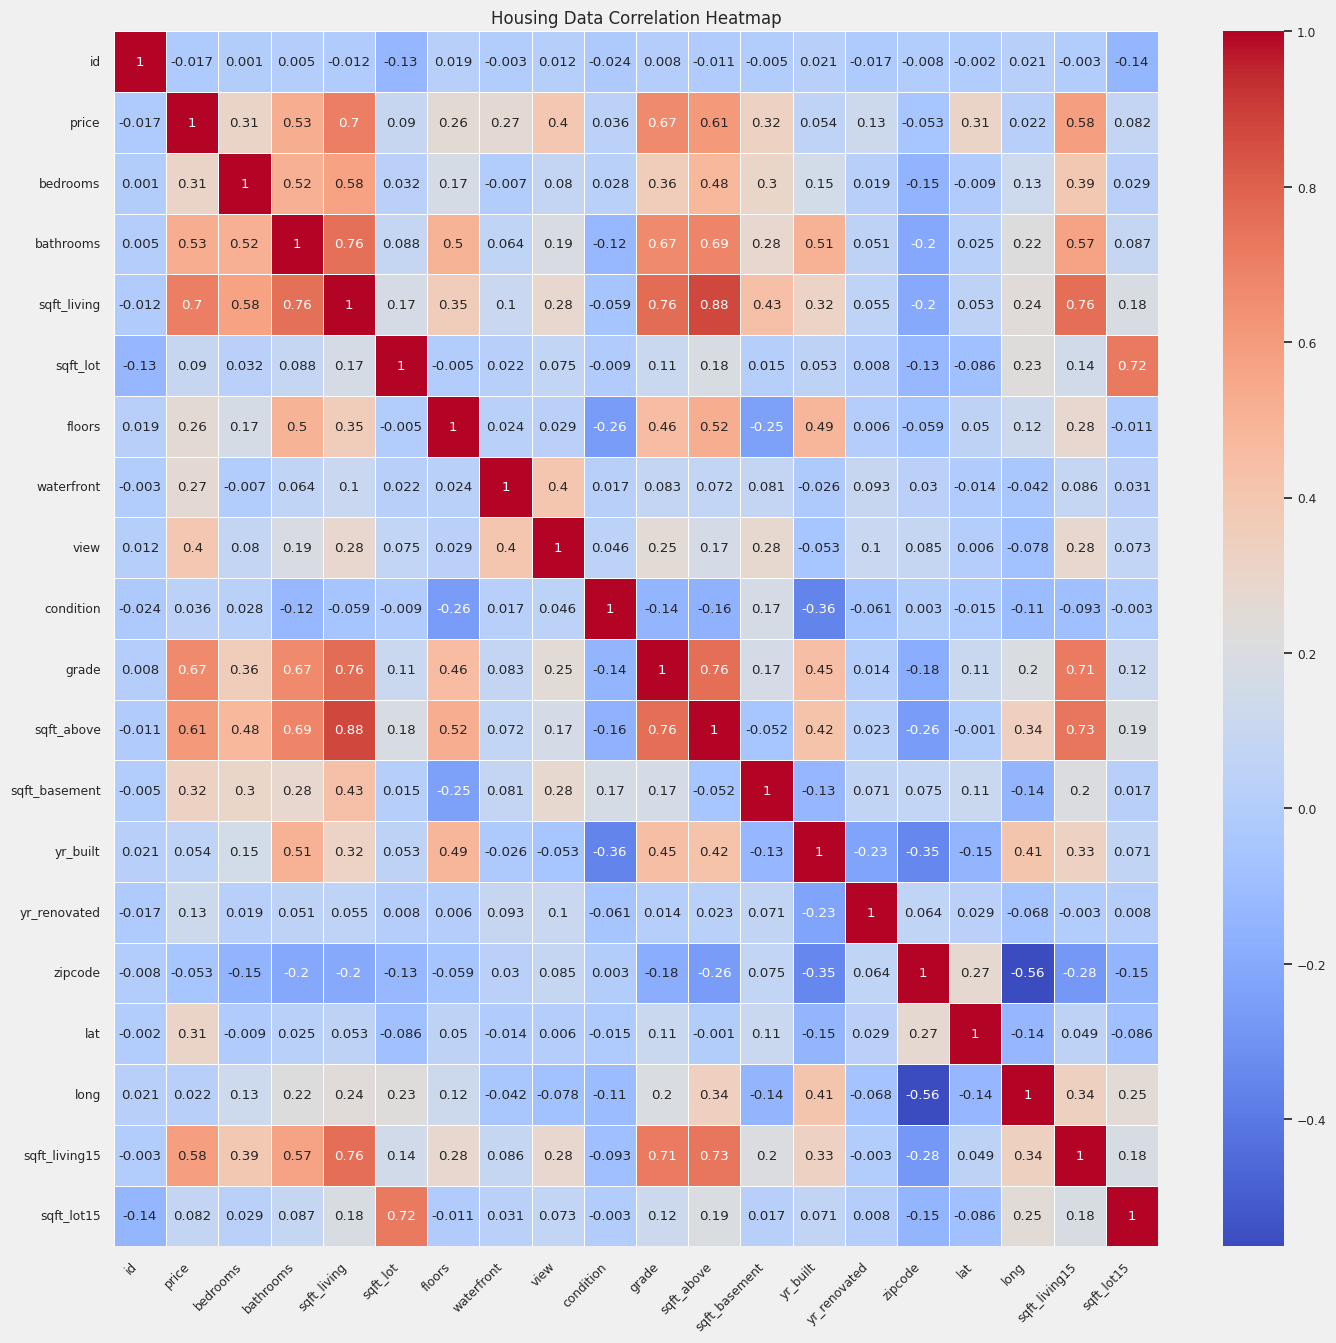

In [120]:
# Using heatmap, we will chart the correlations of all the features

plt. figure(figsize=(15,15))
sns.set(font_scale=0.8) # Too crowded so I decreased the font size
ax=sns.heatmap(house_corr, cmap='coolwarm', annot=True, linewidths = 0.5, cbar =True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Housing Data Correlation Heatmap', fontsize = 12)

plt.show()



# Since the objective of this study is mainly to predict housing price based on property features, I will focus more based on the correlations between price and key features.

#* According to this dataset, house price is mostly related to sqft_living (.7), grade (.67) and sqft_above(0.61) and least related to longtitude (0.022) and condition (.0036)


---



# **Let's do some individual charting based on the most related key features.**

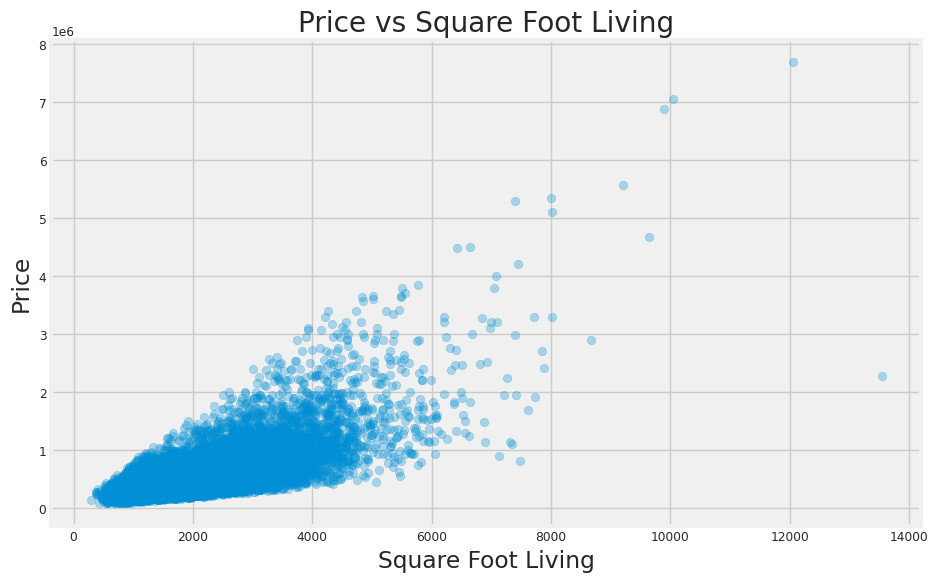

In [121]:
# from matplotlib import colormaps
# Price vs Square Foot Living

plt.figure(figsize =(10, 6))
plt.style.use('fivethirtyeight')
plt.scatter(housing['sqft_living'], housing['price'], alpha=0.3)
plt.xlabel('Square Foot Living')
plt.ylabel('Price')
plt.title('Price vs Square Foot Living')
plt.show()

Discovery:

Apart from some outliers, there is a strong positive correlation between living/livable square foot vs price.
The square foot living (sqft_living)is mostly concentrated < 4500 sqt

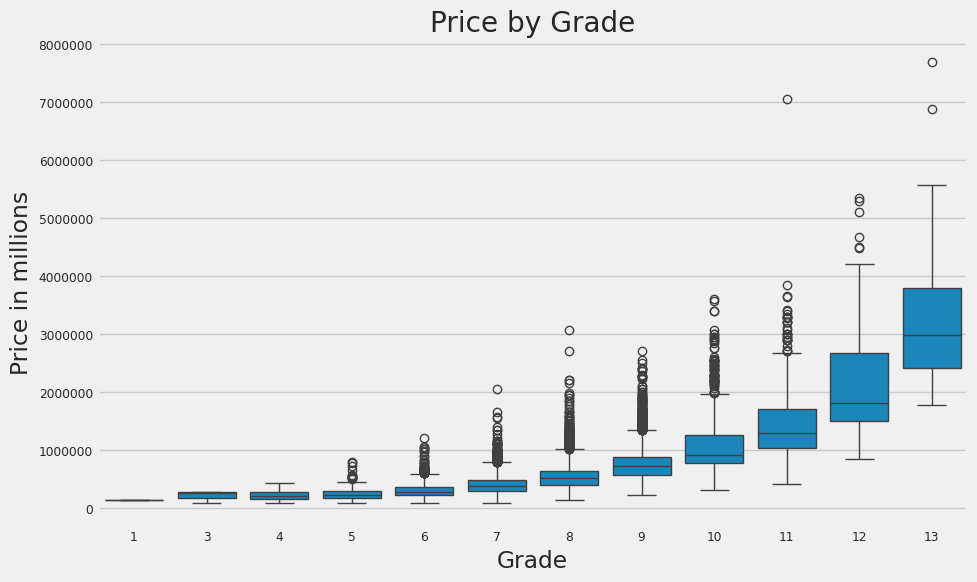

In [122]:
# Since grade is the 2nd storngest correlated feature, let's do a boxplot of
# price by grade.
# Even though grade is a int datatype, it is categorical in nature, (categorical -> price)

plt.figure(figsize =(10,6))
plt.style.use('fivethirtyeight')

sns.boxplot(x='grade', y='price', data= housing)

plt.title('Price by Grade')
plt.xlabel('Grade')
plt.ylabel('Price in millions')
plt.ticklabel_format(style='plain', axis='y')

plt.show()


Discovery:


* Price goes go up gently with each grade level until grade 8
* After grade 8, the price incremental more dramastically
* After grade 10, the price doubles that of grade 8
* After grade 11, the price increases sustaintially, almost doubling that of grade 11

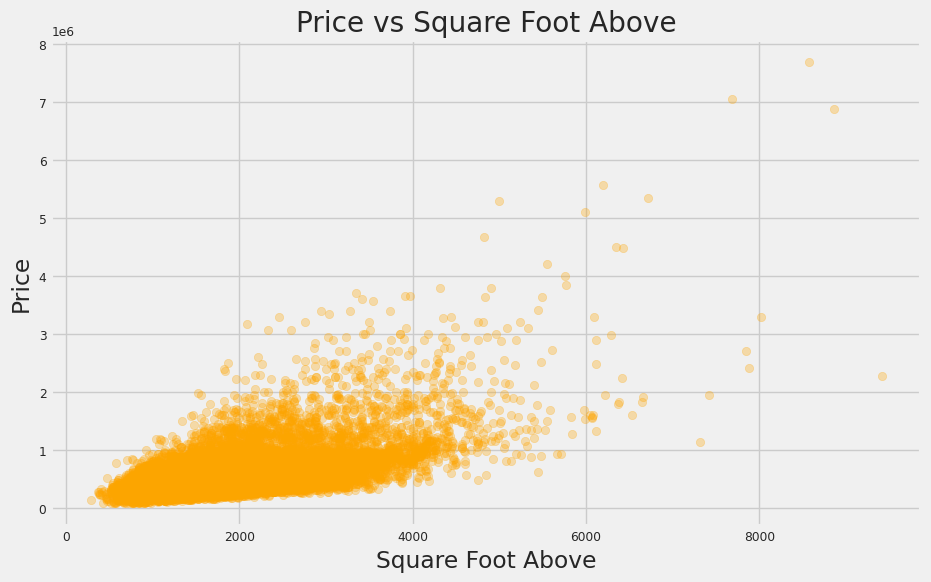

In [123]:
# from matplotlib import colormaps
# price vs square foot above

plt.figure(figsize =(10, 6))
plt.style.use('fivethirtyeight')
plt.scatter(housing['sqft_above'], housing['price'], alpha=0.3, color='Orange')
plt.xlabel('Square Foot Above')
plt.ylabel('Price')
plt.title('Price vs Square Foot Above')
plt.show()

# Again, there is a positive relationship between the square foot aove and price

Skewness: 4.024069144684712
Kurtosis: 34.58554043194243


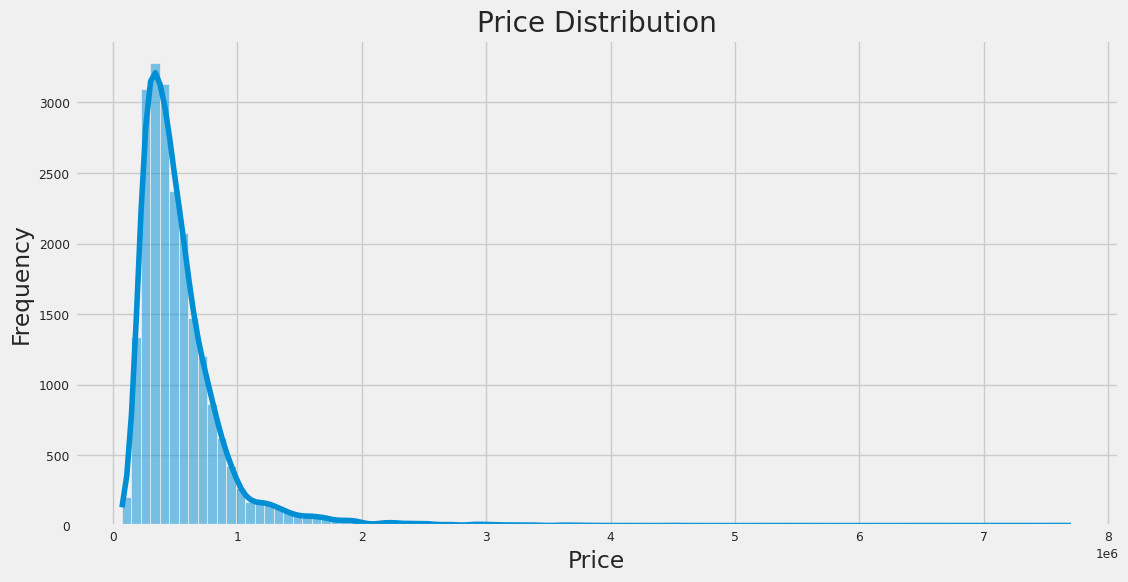

In [124]:
# Determine whether that the target variable is skewed and if so, how is it skewed.
# Let find out about the price sns.distributions by uing a histogram

plt.figure(figsize= (12,6))
sns.histplot(housing['price'], bins=100, kde=True, color='C0')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# let's find the skewness and the tail in metrics
print(f'Skewness: {housing["price"].skew()}')
print(f'Kurtosis: {housing["price"].kurt()}')





# Discovery:

### The chart below shows a highly-skewed curve
### Skewness is =4.02, which is above the normal -1 to +1 range
- Most house prices are clustered at the lower end
- A righ long tail indicated a very small number of extreamely expensive homes
- The mean is inflated because of the outliers

### Kurtosis = 34.59, which is much higher than normal range of 3 (heavy tails)
- The tail is not long but very heavy
- The rare and yet extreamely expensive house prices increase the kurtosis

In [125]:
# Take a look at the IQR
housing_q1 = housing['price'].quantile(.25)
housing_q3 = housing['price'].quantile(.75)
print(f'25% House price are below: ${housing_q1}, 75% House price are below: ${housing_q3}')

iqr_price = housing_q3 - housing_q1
lower_bound_price = housing_q1 - (1.5 * iqr_price)
upper_bound_price = housing_q3 + (1.5 * iqr_price)

print(f'The house price range from 25% to 75% are: {iqr_price}')
print(f'The lower bound is: {lower_bound_price}')
print(f'The upper bound is: {upper_bound_price}')


25% House price are below: $321950.0, 75% House price are below: $645000.0
The house price range from 25% to 75% are: 323050.0
The lower bound is: -162625.0
The upper bound is: 1129575.0



# Discovery:
- The lower bound is negative, which means there's a lot outliers
- Using the IQR data and the above histogram chart with the discovery of high skewness and the Kurtois, is is shown that the house pirces are not normally distributed and will likely benefit from a transformatio or winsorization

In [126]:
# Determine the ratio to transform

high_price= housing['price'].quantile([0.90, 0.93, 0.95, 0.97, 0.99, 0.995 ])
high_price
print(f'House price above 90% has: {housing[housing['price'] > high_price[0.90]].value_counts().sum()} rows')
print(f'House price above 95% has: {housing[housing['price'] > high_price[0.95]].value_counts().sum()} rows')
print(f'House price above 97% has: {housing[housing['price'] > high_price[0.97]].value_counts().sum()} rows')
print(f'House price above 99% has: {housing[housing['price'] > high_price[0.99]].value_counts().sum()} rows')

# Discovery:

# After testing around, I discovered that capping at the 97/3 gives me the
# best KDE

housing_price_97 = housing['price'].quantile(.97)

low_price = housing['price'].quantile(0.03)
print(f'House price below 3% has: {housing[housing['price'] < low_price].value_counts().sum()} rows')

# Inpect these rows before transformation
display(housing[housing['price']> housing_price_97].head(5))
display(housing[housing['price'] < low_price].head(5))




House price above 90% has: 2161 rows
House price above 95% has: 1081 rows
House price above 97% has: 648 rows
House price above 99% has: 217 rows
House price below 3% has: 649 rows


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
125,4389200955,20150302T000000,1450000.0,4,2.75,2750,17789,1.5,0,0,...,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
153,7855801670,20150401T000000,2250000.0,4,3.25,5180,19850,2.0,0,3,...,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
216,46100204,20150221T000000,1505000.0,5,3.00,3300,33474,1.0,0,3,...,9,1870,1430,1957,1991,98040,47.5673,-122.210,3836,20953
246,2025069065,20140929T000000,2400000.0,4,2.50,3650,8354,1.0,1,4,...,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
18,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
92,4168000060,20150226T000000,153000.0,3,1.00,1200,10500,1.0,0,0,...,7,1200,0,1962,0,98023,47.3220,-122.351,1350,10500
107,3530510041,20140723T000000,188500.0,2,1.75,1240,2493,1.0,0,0,...,8,1240,0,1985,0,98198,47.3813,-122.322,1270,4966
118,3454800060,20150108T000000,171800.0,4,2.00,1570,9600,1.0,0,0,...,6,1570,0,1950,0,98168,47.4965,-122.303,1880,9000


# Discovery:
- Best winsoriztion threashold would be to cap at 97th/3rd percentile, by treating beyond them as outliers.

In [127]:
# Transform the outliers by winsorizing them at 97/3 percentile

# These are the columns that are relevant for prediction, therefore,
# we should winsorize them accordly

# From a while back, we determined these features are relevant for prediction:
cols_to_winsorize = ['price', 'sqft_living', 'sqft_lot', 'sqft_above',
                     'sqft_basement', 'sqft_lot15']

# Function to make a copy of these original columns and name them as 'col+ _copy'
for col in cols_to_winsorize:
  housing[col + '_copy'] = housing[col]

housing[[col + '_copy' for col in cols_to_winsorize]].head(20)

# # Funciton to winsorize to match the 97/3 percentile
def winsorize_housing(s, lower = 0.03, upper = 0.97):
  lower_val = s.quantile(lower)
  upper_val = s.quantile(upper)
  return s.clip(lower=lower_val, upper=upper_val)

# # Execute/Apply the function to the my housing dataframe
for col in cols_to_winsorize:
  housing[col] = winsorize_housing(housing[col])



In [128]:
# Let's inpect them before moving on
# Here are the first 5 rows from 97% and 3% each after winsorization
# They look correct, epecially the price column

row_id_winsorized = [
    5631500400,16000397,2524049179, 7855801670, 2025069065,
    7960900060, 7424700045, 4168000060,
    8658300340, 41000454, 8802400416, 3340401535
]
housing[housing['id'].isin(row_id_winsorized)]



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,price_copy,sqft_living_copy,sqft_lot_copy,sqft_above_copy,sqft_basement_copy,sqft_lot15_copy
2,5631500400,20150225T000000,191342.0,2,1.00,840,10000.0,1.0,0,0,...,47.7379,-122.233,2720,8062.0,180000.0,770,10000,770,0,8062
18,16000397,20141205T000000,191342.0,2,1.00,1200,9850.0,1.0,0,0,...,47.3089,-122.210,1060,5095.0,189000.0,1200,9850,1200,0,5095
21,2524049179,20140826T000000,1388000.0,3,2.75,3050,44867.0,1.0,0,4,...,47.5316,-122.233,4110,20336.0,2000000.0,3050,44867,2330,720,20336
92,4168000060,20150226T000000,191342.0,3,1.00,1200,10500.0,1.0,0,0,...,47.3220,-122.351,1350,10500.0,153000.0,1200,10500,1200,0,10500
153,7855801670,20150401T000000,1388000.0,4,3.25,4140,19850.0,2.0,0,3,...,47.5620,-122.162,3160,9750.0,2250000.0,5180,19850,3540,1640,9750
246,2025069065,20140929T000000,1388000.0,4,2.50,3650,8354.0,1.0,1,4,...,47.6338,-122.072,3120,18841.0,2400000.0,3650,8354,1830,1820,18841
269,7960900060,20150504T000000,1388000.0,4,3.25,4140,20100.0,1.5,0,2,...,47.6312,-122.223,3890,20060.0,2900000.0,5050,20100,4750,300,20060
282,7424700045,20150513T000000,1388000.0,5,3.00,3830,8480.0,2.0,0,1,...,47.6166,-122.287,3050,7556.0,2050000.0,3830,8480,2630,1200,7556
465,8658300340,20140523T000000,191342.0,1,0.75,840,5050.0,1.0,0,0,...,47.6499,-121.909,1200,7500.0,80000.0,430,5050,430,0,7500
704,41000454,20140815T000000,191342.0,2,1.00,880,9000.0,1.0,0,0,...,47.4672,-122.291,1410,10000.0,130000.0,880,9000,880,0,10000



# Discovery:
## Comparing the original price ('price_copy') and winsorized price column ('price')-
- the price of row #2, #18 (lower < 3%) has increased and capped at 3%
- the price of row #21 (> 97% ) has decreased and capped at 97%

Skewness: 1.377813134039648
Kurtosis: 1.7229118540555515


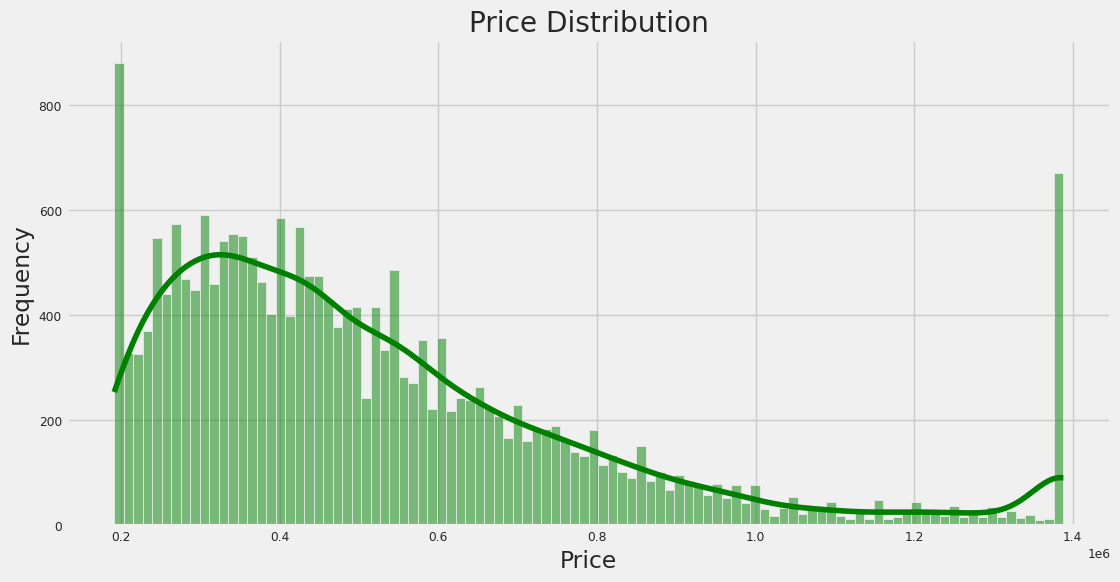

In [129]:
# After winsorizing the housing dataframe and capping at 97/3 ratio ,
# let's rechart the histogram with KDE.

plt.figure(figsize= (12,6))
sns.histplot(housing['price'], bins=100, kde=True, color='Green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# let's find the skewness and the tail in metrics
print(f'Skewness: {housing["price"].skew()}')
print(f'Kurtosis: {housing["price"].kurt()}')


# Discovery:
- The curve looks better on the chart & both the skewness and kurtosis improved
- Skewness: 1.377813134039648  - lightly beyond -1 to 1 range
- Kurtosis: 1.7229118540555515 - under 3 std

In [130]:
housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,price_copy,sqft_living_copy,sqft_lot_copy,sqft_above_copy,sqft_basement_copy,sqft_lot15_copy
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.00,1.0,0,0,...,47.5112,-122.257,1340,5650.00,221900.0,1180,5650,1180,0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.00,2.0,0,0,...,47.7210,-122.319,1690,7639.00,538000.0,2570,7242,2170,400,7639
2,5631500400,20150225T000000,191342.0,2,1.00,840,10000.00,1.0,0,0,...,47.7379,-122.233,2720,8062.00,180000.0,770,10000,770,0,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.00,1.0,0,0,...,47.5208,-122.393,1360,5000.00,604000.0,1960,5000,1050,910,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.00,1.0,0,0,...,47.6168,-122.045,1800,7503.00,510000.0,1680,8080,1680,0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1305.36,3.0,0,0,...,47.6993,-122.346,1530,1509.00,360000.0,1530,1131,1530,0,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.00,2.0,0,0,...,47.5107,-122.362,1830,7200.00,400000.0,2310,5813,2310,0,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.00,2.0,0,0,...,47.5944,-122.299,1020,2007.00,402101.0,1020,1350,1020,0,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388.00,2.0,0,0,...,47.5345,-122.069,1410,1426.36,400000.0,1600,2388,1600,0,1287



# Model Building
## Project Goal
- Build regression models to **predict housing prices** based on property features.
- Compare **Linear Regression, Ridge Regression, and Lasso Regression**.
- Evaluate models using metrics:
  - **R²** (variance explained)
  - **MAE** (mean absolute error)
  - **RMSE** (root mean squared error)

In [131]:
# Find the features that have the most correlations and use them for the modeling

house_price_corr= housing.corr(numeric_only=True)['price'].\
  sort_values(ascending=False).round(3)
house_price_corr


,price
price,1.000
price_copy,0.912
grade,0.707
sqft_living_copy,0.704
sqft_living,0.699
sqft_living15,0.629
sqft_above_copy,0.613
sqft_above,0.600
bathrooms,0.537
view,0.379



# Discovery: We will use the following columns for the predictive modeling because of their possible strong correlation with price

- 'sqft_living', 'sqft_above', 'grade',  'bathrooms', 'bedrooms', 'view', 'waterfront', 'floor', 'lat', 'sqft_living15',

In [132]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Taken from above we will use these features for our predicted modeling

features = [
    'sqft_living',
    'sqft_above',
    'bathrooms',
    'bedrooms',
    'grade',
    'view',
    'waterfront',
    'floors',
    'lat',
    'sqft_living15'
]
X = housing[features]
y = housing['price']

# split the train/test at 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size =0.2, random_state=42)

# Define a function that returns R2, MSE, RMSE training and test dataset
def evaluate_model(model, X_train, X_test, y_train, y_test):
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  return {
      'R2 Train': r2_score(y_train, y_pred_train),
      'R2 Test': r2_score(y_test, y_pred_test),

      'MAE Train': mean_absolute_error(y_train, y_pred_train),
      'MAE Test': mean_absolute_error(y_test, y_pred_test),

      'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
      'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
  }


In [133]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Execute the function from the above cell
lr_result = evaluate_model(lr, X_train, X_test, y_train, y_test)
lr_result


{'R2 Train': 0.698373699073271,
 'R2 Test': 0.7063322807741118,
 'MAE Train': 111535.7997943206,
 'MAE Test': 111570.46627270129,
 'RMSE Train': np.float64(152029.41325164528),
 'RMSE Test': np.float64(152512.83206905)}

- R² Test = 0.706	The model explains 70.6% of price variance.
- R2 Traing and Test are very similar, just slightly underfitting
- MAE Test and Train are very similar,
- MAE Test is 111,570
- RMSE Test and Train are very similar
- RMSE is 152,512

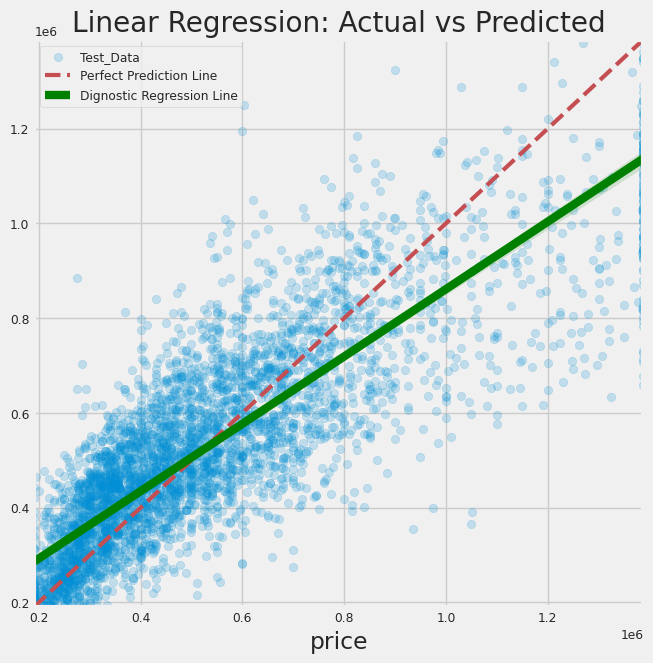

In [134]:
# Plot the Linear Regression

y_pred_housing_lr = lr.predict(X_test)

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(7, 7))
    plt.scatter(y_test, y_pred_housing_lr, alpha = 0.2, label = 'Test_Data')

    # Need to have 2D points because we are not just testing 1 feature but
    # multiple features
    # with the min/max on y data forming 2 points so we can draw a line

  # set axis limits first and then plot the line to make the dots look clearner

    plt.xlim([y_test.min(), y_test.max()])
    plt.ylim([y_test.min(), y_test.max()])

    plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
    'r--', linewidth=3, label='Perfect Prediction Line')

  # Plot the diagnostic regression line
    sns.regplot(x=y_test, y=y_pred_housing_lr, scatter=False, color='green',
                label= 'Dignostic Regression Line')
    plt.title("Linear Regression: Actual vs Predicted")
    plt.legend()
    plt.show()



Text(0.5, 1.0, 'Residual vs Predicted Price for Linear Regression')

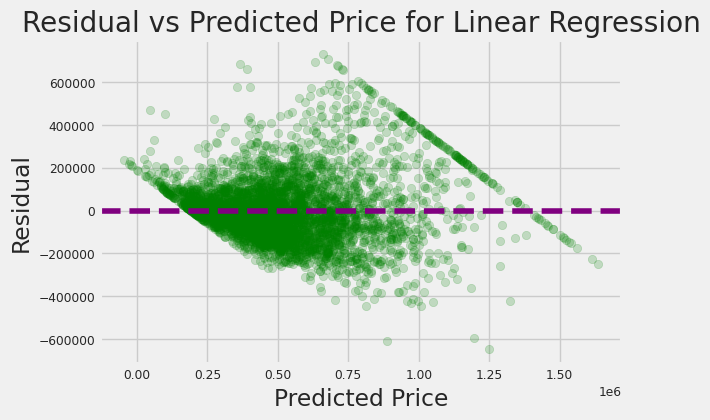

In [145]:
# I like to know where the predicted errors happen.
# Let's do a Residual vs Predicted Plot

residuals_lr = y_test - y_pred_housing_lr
# y_pred_housing_lr.min(), y_pred_housing_lr.max()
plt.figure(figsize=(6,4))
plt.scatter(y_pred_housing_lr, residuals_lr, alpha=0.2, color='green')
plt.axhline(y=0, color='purple', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residual')
plt.title('Residual vs Predicted Price for Linear Regression')



# Discovery:
- The residuals are centered around zero, with most errors occuring $125k to $750k
- range. Error magnitude start to increase until it reaches at the height of
- 0.7 million or 700k price houses, where the model under predicts by 600,000,
- and at the lowest point, at 1.25 million, where the model over predicts by
- 600,000. But these few dots present themselves more like outliers rather than
- consistent prediction. Most of the residuals range roughly from −$300,000 to
- +$300,000

In [136]:
# The dataset has a large range value in price.
# Before I do Lasso and Ridge modeling,
# we need to scale the model because regularization (the penalty terms)
# depend on coefficient size.
# If model is not scaled, features with large numeric ranges get punished more,
# causing distorted coefficients or incorrect feature elimination.

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

# Initialize our model with the scaled data
ss = StandardScaler()

# Fit our scaled data on training data
X_trained_scaled = ss.fit_transform(X_train)

# Transform our scaled data on testing data
X_test_scaled = ss.transform(X_test)

# Convert back to DataFrame for readability

X_train_scaled = pd.DataFrame(X_trained_scaled, columns =X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)



In [137]:
# Lasso regression
from sklearn.linear_model import Ridge, Lasso

# Initialize the model using alpha = 600
lasso = Lasso(alpha=60)
lasso.fit(X_train_scaled, y_train)

# Evaluate the model
lasso_result = evaluate_model(lasso, X_train_scaled, X_test_scaled, y_train, y_test)
lasso_result


{'R2 Train': 0.6983723792506538,
 'R2 Test': 0.7063082833571397,
 'MAE Train': 111538.09672187462,
 'MAE Test': 111577.40427414574,
 'RMSE Train': np.float64(152029.745867929),
 'RMSE Test': np.float64(152519.0633280881)}

In [138]:
# Can also use the Pipeline ()

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# lasso_pipe = Pipeline([
#     ('ss', StandardScaler()),
#     ('lasso', Lasso(alpha=600))
# ])

# lasso_pipe.fit(X_train, y_train)

# lasso_result1=evaluate_model(lasso_pipe, X_train, X_test, y_train, y_test)
# lasso_result1


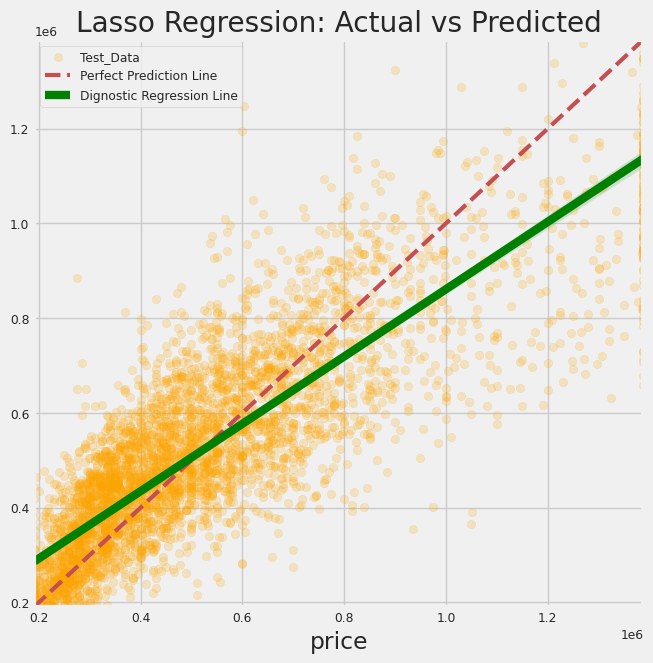

In [139]:
# Plot the Lasso scaled Regression

y_pred_housing_lasso = lasso.predict(X_test_scaled)

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(7, 7))
    plt.scatter(y_test, y_pred_housing_lasso, alpha = 0.2, label = 'Test_Data', color='Orange')

    # Need to have 2D points because we are not just testing 1 feature but
    # multiple features
    # with the min/max on y data forming 2 points so we can draw a line

  # set axis limits first and then plot the line to make the dots look clearner
    plt.xlim([y_test.min(), y_test.max()])
    plt.ylim([y_test.min(), y_test.max()])

    plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
    'r--', linewidth=3, label='Perfect Prediction Line')

  # Plot the diagnostic regression line
    sns.regplot(x=y_test, y=y_pred_housing_lasso, scatter=False, color='green',
                label= 'Dignostic Regression Line')
    plt.title("Lasso Regression: Actual vs Predicted")
    plt.legend()
    plt.show()

# Discovery:
## Linear Regression -
- It uses all features
- Imposes penalty
- Higher variance theoretically

## Lasso Regression
- Penalizes coefficient size
- Slightly more stable
- Can do feature selection (if needed)

## Both Linear Regression and Lasso Regression
- Have nearly identical predictive results and diagnostic patterns, indicating that the original feature
- Set generalizes well and does not require strong regularization.

In [140]:
# Ridge regression

# Initialize the model using alpha = 600
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Evaluate the model
Ridge_result = evaluate_model(ridge, X_train_scaled, X_test_scaled, y_train, y_test)
Ridge_result


{'R2 Train': 0.6983736946234869,
 'R2 Test': 0.7063315275136933,
 'MAE Train': 111535.71886796002,
 'MAE Test': 111570.63315989176,
 'RMSE Train': np.float64(152029.41437306284),
 'RMSE Test': np.float64(152513.02766733765)}

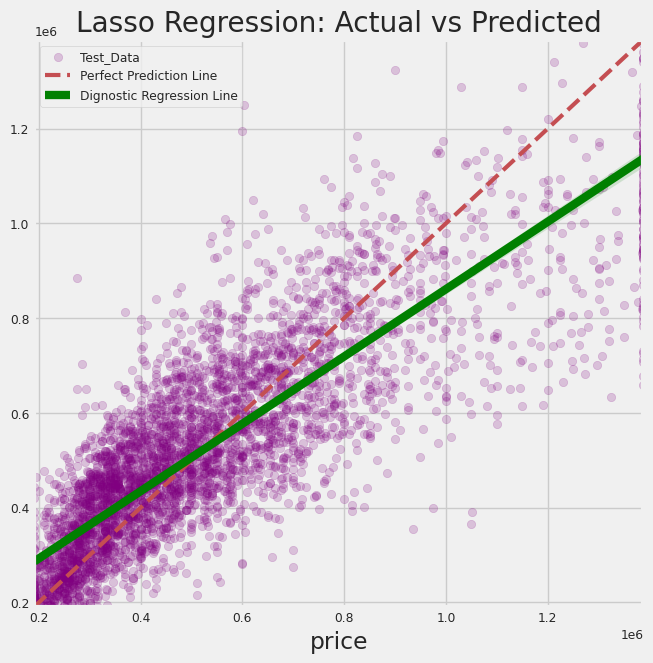

In [141]:
# Plot the Ridge scaled Regression

y_pred_housing_ridge = ridge.predict(X_test_scaled)

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(7, 7))
    plt.scatter(y_test, y_pred_housing_ridge, alpha = 0.2, label = 'Test_Data', color='Purple')

    # Need to have 2D points because we are not just testing 1 feature but
    # multiple features
    # with the min/max on y data forming 2 points so we can draw a line

  # set axis limits first and then plot the line to make the dots look clearner
    plt.xlim([y_test.min(), y_test.max()])
    plt.ylim([y_test.min(), y_test.max()])

    plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
    'r--', linewidth=3, label='Perfect Prediction Line')

  # Plot the diagnostic regression line
    sns.regplot(x=y_test, y=y_pred_housing_ridge, scatter=False, color='green',
                label= 'Dignostic Regression Line')
    plt.title("Lasso Regression: Actual vs Predicted")
    plt.legend()
    plt.show()

In [142]:
# Let's see how many features Lasso removed: 0
(lasso.coef_ == 0).sum()

np.int64(0)

# Discovery:
- Lasso regularization did not set any coefficients to zero, indicating that all selected features contribute meaningfully to the model and that strong regularization was not necessary.

- The result of Lasso is very similar to that of LR

In [143]:
# comparing coeff
pd.DataFrame({
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
}, index=X_train.columns)


,Linear,Ridge,Lasso
sqft_living,131.652150,108500.914317,107924.302257
sqft_above,-17.911700,-13467.520552,-12904.574210
bathrooms,-2413.436845,-1836.783207,-1592.951126
bedrooms,-7110.087546,-6616.978041,-6519.360697
grade,76660.440234,89708.596964,89571.476614
view,56606.025685,43120.414945,43160.583418
waterfront,198898.284243,16782.710880,16725.236298
floors,-7143.108351,-3884.256108,-3972.258628
lat,627704.656954,86890.164086,86888.654655
sqft_living15,35.051118,23883.165508,23790.780335



# Discovery:
- While Ridge and Lasso coefficients differ in magnitude from the linear  regression coefficients due to feature scaling, Ridge and Lasso coefficients  are nearly identical to each other.
- This indicates that regularization had minimal impact on feature importance and that all selected predictors contribute meaningfully to price prediction.